Никита, добрый день! Посмотрите, пожалуйста, базовые корреляции и регрессии по следующим пунктам:
Политический интерес (Q7) и обсуждение политических вопросов (Q8), их связь с потреблением развлекательного и новостного контента (Q55, Q56, Q57)

Потребление развлекательного и новостного контента (Q55, Q56, Q57) и доверие к институтам власти (Q10)

Потребление развлекательного и новостного контента (Q55, Q56, Q57) и политическая самоэффективность (Q11)

Потребление развлекательного и новостного контента (Q55, Q56, Q57) и политическое участие (Q12)

Потребление развлекательного и новостного контента (Q55, Q56, Q57) и отношение к пенсионной реформе (Q14)

Потребление развлекательного и новостного контента (Q55, Q56, Q57) и партизаншип (Q17-Q19)

Потребление развлекательного и новостного контента (Q55, Q56, Q57) и отношение к путину и едру (Q20-21)

Вводный блок: перекодировка переменных

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.linear_model import LinearRegression
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_spss('d.sav')

df_relevant = df[['Q7', 'Q8', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q11', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q14', 'Q17', 'Q17_7T', 'Q18', 'Q18_7T', 'Q19', 'Q20', 'Q21', 'Q55_1', 'Q55_2', 'Q55_3', 'Q55_4', 'Q55_5', 'Q55_6', 'Q55_7', 'Q56_1', 'Q56_2', 'Q56_3', 'Q57_1', 'Q57_2', 'Q57_3', 'Q57_4', 'Q57_5', 'Q57_6', 'Q57_7']]
df_relevant.replace('Затрудняюсь ответить /НЕ ЧИТАТЬ/', np.NaN, inplace=True)

In [3]:
political_interest = {
    'Совсем не интересуюсь':-3,
    'Не интересуюсь':-2,
    'Скорее не интересуюсь':-1,
    'Отчасти интересуюсь, отчасти не интересуюсь':0,
    'Скорее интересуюсь':1,
    'Интересуюсь':2,
    'Очень интересуюсь':3
    }

df_relevant['political_interest'] = df['Q7'].replace(political_interest)

In [4]:
political_discussions = {
    'Не обсуждаются':0,
    'Раз в месяц или реже':1,
    'Два-три раза в месяц':2,
    'Каждую неделю':3,
    'Два-три раза в неделю':4,
    'Практически каждый день':5
    }

df_relevant['political_discussions'] = df['Q8'].replace(political_discussions)

In [5]:
trust = {
    'Совсем НЕ доверяю':-2,
    'Скорее НЕ доверяю':-1,
    'Отчасти доверяю, отчасти не доверяю':0,
    'Скорее доверяю':1,
    'Полностью доверяю':2
    }

for a, b in [['Q10_1', 'trust_president'], ['Q10_2', 'trust_cabinet'], ['Q10_3', 'trust_governor'], ['Q10_4', 'trust_elections'], ['Q10_5', 'trust_parties']]:
    df_relevant[b] = df_relevant[a].replace(trust)

In [6]:
actions_effect = {
    'Почти или совсем нет':0,
    'Немного':1,
    'Умеренно':2,
    'Значительно':3,
    'В полной мере':4
    }

df_relevant['actions_effect'] = df['Q11'].replace(actions_effect)

In [7]:
action = {
    'Да':1,
    'Нет':0
    }

for a, b in [['Q12_1', 'action_hearings'], ['Q12_2', 'action_protest'], ['Q12_3', 'action_petition'], ['Q12_4', 'action_demand'], ['Q12_5', 'action_agit'], ['Q12_6', 'action_finance']]:
    df_relevant[b] = df_relevant[a].replace(action)

In [8]:
attitude = {
    'Очень отрицательно':-2,
    'Скорее отрицательно':-1,
    'Отчасти отрицательно, отчасти положительно':0,
    'Скорее положительно':1,
    'Очень положительно':2
    }

df_relevant['pension_reform'] = df['Q14'].replace(attitude)
df_relevant['er_attitude'] = df['Q20'].replace(attitude)
df_relevant['putin_attitude'] = df['Q21'].replace(attitude)

In [9]:
df_relevant = pd.concat([df_relevant, pd.get_dummies(df_relevant['Q17'])], axis=1)

In [10]:
frequency = {
    'Никогда':0,
    'Реже, чем 1-2 раза в месяц':1,
    '1 или 2 раза в месяц':2,
    'Примерно раз в неделю':3,
    '2-3 раза в неделю':4,
    'Каждый день/почти каждый день':5
    }

for a, b in [
            ['Q55_1', 'source_newspapers'], 
            ['Q55_2', 'source_tv'], 
            ['Q55_3', 'source_radio'], 
            ['Q55_4', 'source_internet'], 
            ['Q55_5', 'source_socialmedia'], 
            ['Q55_6', 'source_messengers'],
            ['Q55_7', 'source_talks'],
            ['Q56_1', 'info_state'],
            ['Q56_2', 'info_opposition'],
            ['Q56_3', 'info_independent'],
            ['Q57_1', 'humor_ch1'],
            ['Q57_2', 'humor_urgant'],
            ['Q57_3', 'humor_ovr'],
            ['Q57_4', 'humor_comedy'],
            ['Q57_5', 'humor_tnt'],
            ['Q57_6', 'humor_pelmeni'],
            ['Q57_7', 'humor_analytical']
            ]:
                df_relevant[b] = df_relevant[a].replace(frequency)

Визуализация распределений ключевых переменных

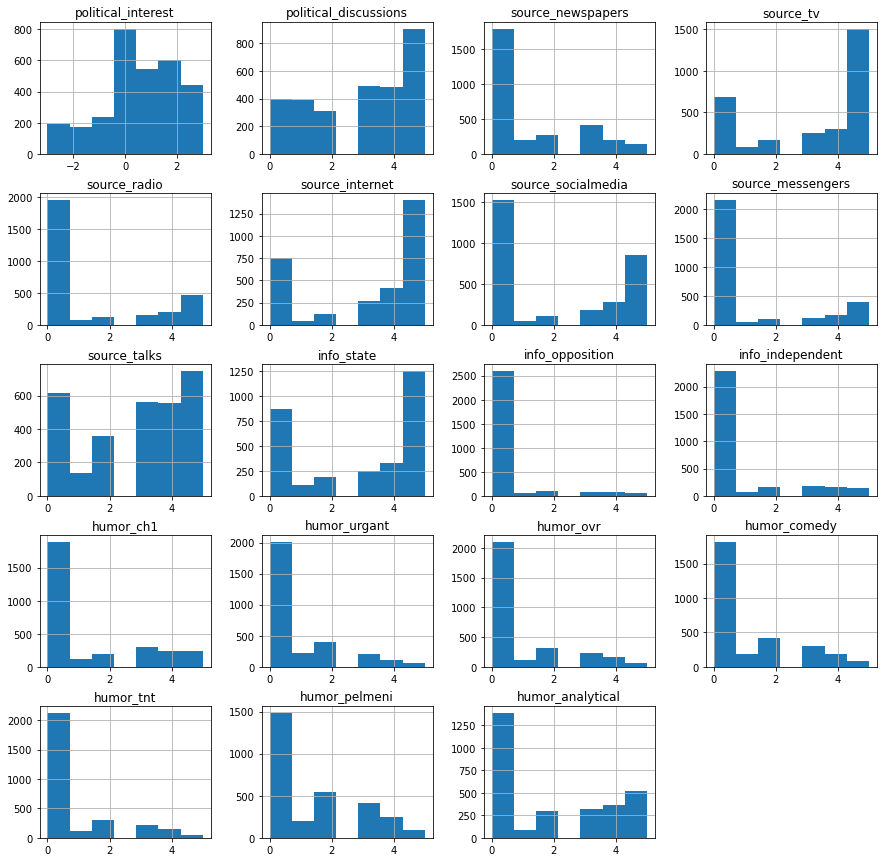

In [11]:
df1 = df_relevant[['political_interest', 'political_discussions', 'source_newspapers', 'source_tv', 'source_radio', 'source_internet', 'source_socialmedia', 'source_messengers', 'source_talks', 'info_state', 'info_opposition', 'info_independent', 'humor_ch1', 'humor_urgant', 'humor_ovr', 'humor_comedy', 'humor_tnt', 'humor_pelmeni', 'humor_analytical', 'putin_attitude']]
hist = df1.hist(figsize = (15,15), bins=7)

In [12]:
df1.describe()

,political_interest,political_discussions,source_newspapers,source_tv,source_radio,source_internet,source_socialmedia,source_messengers,source_talks,info_state,info_opposition,info_independent,humor_ch1,humor_urgant,humor_ovr,humor_comedy,humor_tnt,humor_pelmeni,humor_analytical
count,2993.000000,2980.000000,2999.000000,2995.000000,2999.000000,2993.000000,2989.000000,2986.000000,2973.000000,2990.000000,2994.000000,2994.000000,2992.000000,2993.000000,2987.000000,2990.000000,2992.000000,2987.000000,2992.000000
mean,0.643836,3.007047,1.144715,3.308514,1.326109,3.258603,2.061894,1.076356,2.860410,2.941137,0.382098,0.743153,1.188503,0.769796,0.796451,1.027425,0.762032,1.330097,1.921791
std,1.672794,1.789047,1.592510,2.060453,1.981996,2.073019,2.245742,1.868059,1.828357,2.143375,1.100812,1.480634,1.745385,1.275330,1.376076,1.465991,1.340490,1.533782,2.017120
min,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,2.000000,5.000000,2.000000,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,5.000000,0.000000,0.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,4.000000
max,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Корреляционный анализ

<AxesSubplot:>

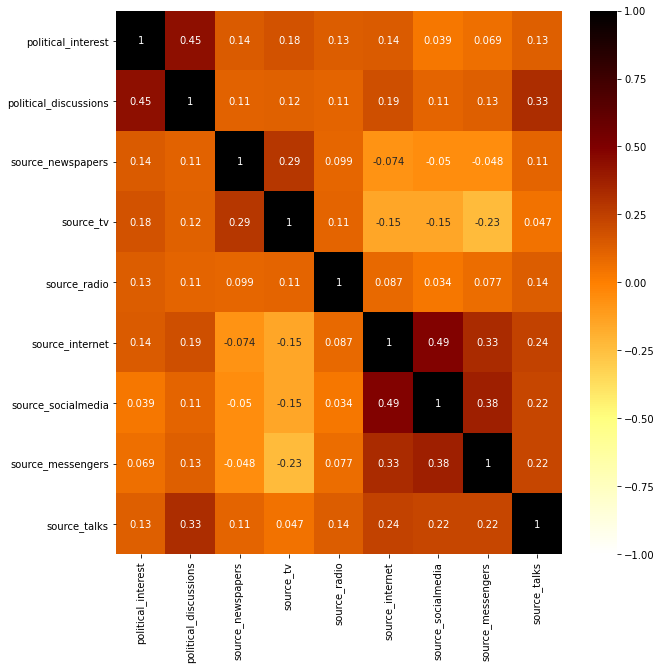

In [13]:
# Политический интерес и обсуждение политических вопросов & источники информации

df1 = df_relevant[['political_interest', 'political_discussions', 'source_newspapers', 'source_tv', 'source_radio', 'source_internet', 'source_socialmedia', 'source_messengers', 'source_talks']]

plt.figure(figsize=(10,10))
df1_corr = df1.corr()

sns.heatmap(df1_corr, cmap='afmhot_r', annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

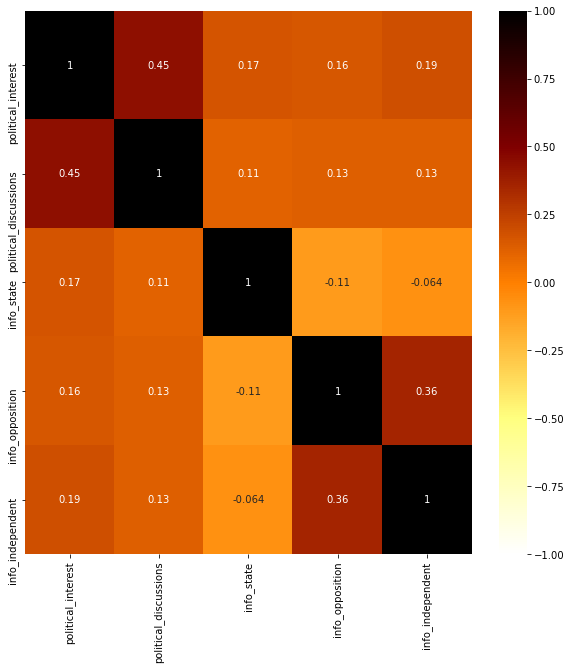

In [14]:
# Политический интерес и обсуждение политических вопросов & источники новостей

df1 = df_relevant[['political_interest', 'political_discussions', 'info_state', 'info_opposition', 'info_independent']]

plt.figure(figsize=(10,10))
df1_corr = df1.corr()

sns.heatmap(df1_corr, cmap='afmhot_r', annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

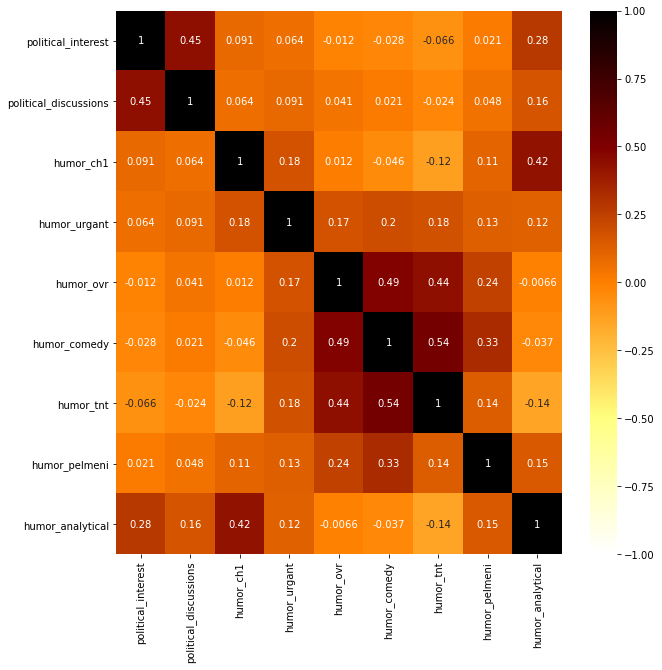

In [15]:
# Политический интерес и обсуждение политических вопросов & развлекательный контент 

df1 = df_relevant[['political_interest', 'political_discussions', 'humor_ch1', 'humor_urgant', 'humor_ovr', 'humor_comedy', 'humor_tnt', 'humor_pelmeni', 'humor_analytical']]

plt.figure(figsize=(10,10))
df1_corr = df1.corr()

sns.heatmap(df1_corr, cmap='afmhot_r', annot=True, vmin=-1, vmax=1)

Регрессионный анализ

In [16]:
inf_source = LinearRegression()

df1 = df_relevant[['political_interest', 
                    'political_discussions', 
                    'source_newspapers', 
                    'source_tv', 
                    'source_radio', 
                    'source_internet', 
                    'source_socialmedia', 
                    'source_messengers', 
                    'source_talks', 
                    'info_state', 
                    'info_opposition', 
                    'info_independent', 
                    'humor_ch1', 
                    'humor_urgant', 
                    'humor_ovr', 
                    'humor_comedy', 
                    'humor_tnt', 
                    'humor_pelmeni', 
                    'humor_analytical', 
                    'putin_attitude']]

inf_source.fit(x = df1[['source_newspapers', 'source_tv', 'source_radio', 'source_internet', 'source_socialmedia', 'source_messengers', 'source_talks']], y = df1['political_interest'])

TypeError: fit() got an unexpected keyword argument 'x'